# notes
For next time:
- split the data into train/test otherwise your scores are too high
- follow the process in the pocket book, first create your features then split, then clean

In [57]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width',1000)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import(train_test_split, StratifiedKFold)
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
pd.options.mode.chained_assignment = None  # default='warn'

In [3]:
titanic_train = pd.read_csv('/Users/leo/Documents/python code/code_snippets/titanic/train.csv')
titanic_test = pd.read_csv('/Users/leo/Documents/python code/code_snippets/titanic/test.csv')

In [5]:
# copy df
titanic = titanic_train

## Split the data

In [10]:
y = titanic.Survived
X = titanic.drop(columns = 'Survived')
print(X.shape)
print(y.shape)

(891, 11)
(891,)


In [106]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

## Data Cleanup

### Missing Values

In [79]:
X_train.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            124
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          484
Embarked         1
dtype: int64

In [70]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 623 entries, 445 to 102
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  623 non-null    int64  
 1   Pclass       623 non-null    int64  
 2   Name         623 non-null    object 
 3   Sex          623 non-null    object 
 4   Age          499 non-null    float64
 5   SibSp        623 non-null    int64  
 6   Parch        623 non-null    int64  
 7   Ticket       623 non-null    object 
 8   Fare         623 non-null    float64
 9   Cabin        139 non-null    object 
 10  Embarked     622 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 58.4+ KB


## Add Features

In [99]:
def addFeatures(df):
    # add deck
    df.loc[:,'deck'] = df.loc[:,'Cabin'].str.slice(0,1)
    
    # add family size
    df.loc[:,'family_size']= df.loc[:,'SibSp']+df.loc[:,'Parch']+1
    return df

### imputers

In [100]:
## actually need to create a pipeline
from sklearn.pipeline import Pipeline

numerical = ['SibSp','Parch','Fare','Age','family_size']
categorical = ['Sex','Pclass','deck']

# Define categorical pipeline
cat_pipe = Pipeline([
    ('cat_imputer',SimpleImputer(strategy = 'constant',fill_value = 'NA')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

# Define numeric pipelines
num_pipe = Pipeline([
    ('num_imputer',SimpleImputer(strategy = 'mean'))
])

preprocessor = ColumnTransformer([
    ('cat', cat_pipe,categorical),
    ('num', num_pipe,numerical)
], remainder = 'drop')

In [107]:
# apply pipeline to training data
X_train = addFeatures(X_train)
X_train = preprocessor.fit_transform(X_train)


# apply pipeline to test data
X_test = addFeatures(X_test)
X_test = preprocessor.transform(X_test)

# Prepare column names
cat_columns = preprocessor.named_transformers_['cat']['encoder'].get_feature_names(categorical)
columns = np.append(cat_columns, numerical)

# create train,test DF
X_train_clean = pd.DataFrame(X_train, columns = columns)
X_test_clean = pd.DataFrame(X_test, columns = columns)

In [112]:
print(X_train_clean.shape)
print(X_test_clean.shape)

(623, 19)
(268, 19)


## EDA

In [113]:
X_train_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sex_female   623 non-null    float64
 1   Sex_male     623 non-null    float64
 2   Pclass_1     623 non-null    float64
 3   Pclass_2     623 non-null    float64
 4   Pclass_3     623 non-null    float64
 5   deck_A       623 non-null    float64
 6   deck_B       623 non-null    float64
 7   deck_C       623 non-null    float64
 8   deck_D       623 non-null    float64
 9   deck_E       623 non-null    float64
 10  deck_F       623 non-null    float64
 11  deck_G       623 non-null    float64
 12  deck_NA      623 non-null    float64
 13  deck_T       623 non-null    float64
 14  SibSp        623 non-null    float64
 15  Parch        623 non-null    float64
 16  Fare         623 non-null    float64
 17  Age          623 non-null    float64
 18  family_size  623 non-null    float64
dtypes: float

In [114]:
print(y_train.value_counts())
print(y_train.value_counts(normalize = True))

0    392
1    231
Name: Survived, dtype: int64
0    0.629213
1    0.370787
Name: Survived, dtype: float64


- majority of people did not survive
- 61% can act as a min accuracy, if we assume everyone parished we should get around 61% accuracy

In [116]:
X_train_clean.describe()

,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_NA,deck_T,SibSp,Parch,Fare,Age,family_size
count,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000
mean,0.341894,0.658106,0.223114,0.211878,0.565008,0.016051,0.051364,0.065811,0.028892,0.036918,0.017657,0.004815,0.776886,0.001605,0.576244,0.386838,31.840730,29.256353,1.963082
std,0.474725,0.474725,0.416669,0.408967,0.496154,0.125774,0.220917,0.248150,0.167639,0.188712,0.131805,0.069281,0.416669,0.040064,1.216267,0.807692,51.027372,13.026811,1.731192
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.420000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,7.925000,22.000000,1.000000
50%,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,14.454200,29.256353,1.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,30.750000,35.000000,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,6.000000,512.329200,80.000000,11.000000


## Models
- RandomForest


In [117]:
from sklearn.ensemble import RandomForestClassifier

In [118]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler

In [140]:
rf_clf = RandomForestClassifier(random_state = 42,n_jobs = -1)

In [121]:
cross_val_score(rf_clf, X_train_clean, y_train, cv = 3, scoring = "accuracy")

array([0.81730769, 0.78846154, 0.82608696])

In [645]:
y_pred = cross_val_predict(rf_clf, titanic_clean, y_train, cv = 3)

## Modeling

#### Baseline Model

In [168]:
# this is the score to beat
from sklearn.dummy import DummyClassifier

bm = DummyClassifier()
bm.fit(X_train_clean, y_train)
bm.score(X_test, y_test)

0.585820895522388

### Grid search

Run a simple grid search on RandomForest to find best parameters for `max_depth`,`n_estimators` and `max_leaf_nodes`

In [139]:
rf_clf.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [182]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'max_depth':[9,10,11,12,13], 'n_estimators':[100,200,300,500], 'max_leaf_nodes':[5,6,8,10,15,16,18]}
]

grid_search = GridSearchCV(
    rf_clf, param_grid, cv = 3, scoring = 'accuracy', return_train_score = True

)

grid_search.fit(X_train_clean, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             param_grid=[{'max_depth': [9, 10, 11, 12, 13],
                          'max_leaf_nodes': [5, 6, 8, 10, 15, 16, 18],
                          'n_estimators': [100, 200, 300, 500]}],
             return_train_score=True, scoring='accuracy')

In [183]:
grid_search.best_params_

{'max_depth': 10, 'max_leaf_nodes': 18, 'n_estimators': 500}

In [184]:
grid_search.best_score_

0.8298727238944631

In [185]:
y_pred = grid_search.best_estimator_.predict(X_test_clean)

In [186]:
from sklearn.metrics import precision_score, recall_score, accuracy_score
print('precision:',precision_score(y_test, y_pred))
print('recall:',recall_score(y_test, y_pred))
print('accuracy:', accuracy_score(y_test, y_pred))

precision: 0.8505747126436781
recall: 0.6666666666666666
accuracy: 0.8134328358208955


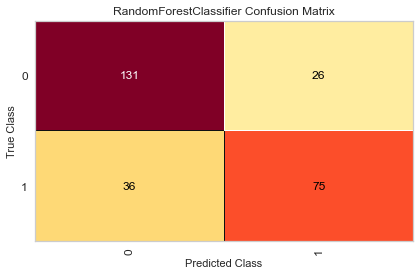

In [187]:
from yellowbrick.classifier import ConfusionMatrix

fig, ax = plt.subplots(figsize=(6,4))
visualizer = ConfusionMatrix(RandomForestClassifier(random_state=42))
visualizer.fit(X_train_clean, y_train)
visualizer.score(X_test_clean, y_test)
visualizer.show();

In [123]:
rf_clf.fit(X_train_clean, y_train)
y_pred = rf_clf.predict(X_test_clean)

In [129]:
probs = rf_clf.predict_proba(X_test_clean)  
probs = probs[:, 1]  

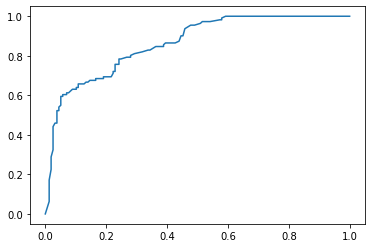

In [130]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)

plt.plot(fpr, tpr)  

In [134]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[131,  26],
       [ 36,  75]])

In [135]:
from sklearn.metrics import precision_score, recall_score, accuracy_score
print('precision:',precision_score(y_test, y_pred))
print('recall:',recall_score(y_test, y_pred))
print('accuracy:', accuracy_score(y_test, y_pred))

precision: 0.7425742574257426
recall: 0.6756756756756757
accuracy: 0.7686567164179104


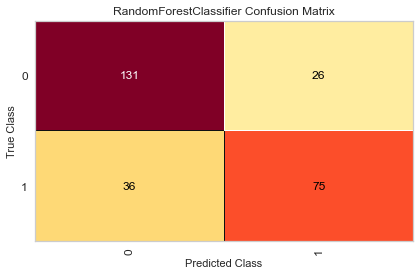

In [151]:
from yellowbrick.classifier import ConfusionMatrix

fig, ax = plt.subplots(figsize=(6,4))
visualizer = ConfusionMatrix(RandomForestClassifier(random_state=42))
visualizer.fit(X_train_clean, y_train)
visualizer.score(X_test_clean, y_test)
visualizer.show();

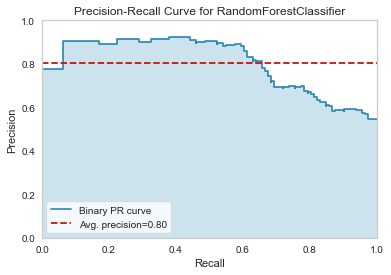

In [138]:
from yellowbrick.classifier import PrecisionRecallCurve

fig, ax = plt.subplots(figsize=(6,4))
viz = PrecisionRecallCurve(RandomForestClassifier(random_state = 42))
viz.fit(X_train_clean, y_train)
viz.score(X_test_clean, y_test)

viz.show();